In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf

# Initialize SparkContext
sc = SparkContext.getOrCreate()

## reading all JSON files 

In [2]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Read JSON Files") \
    .getOrCreate()

# Read the JSON files
spark.read.option("multiline", "true").json("yelp_academic_dataset_business.json")
business = spark.read.json("yelp_academic_dataset_business.json")
review = spark.read.json("yelp_academic_dataset_review.json")
tip = spark.read.json("yelp_academic_dataset_tip.json")
checkin = spark.read.json("yelp_academic_dataset_checkin.json")

## Business  

In [3]:
# Reading schema of all jsons
print("Schema of Business:")
business.printSchema()
print("First few rows of Business:")
business.show(5)
print(business.count())

tem = business.select("business_id") .distinct()
print(tem.count())



Schema of Business:
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |--

## Review

In [4]:
print("Schema of Review:")
review.printSchema()

print("First few rows of Review:")
#review.show(5)
print(review.count())

Schema of Review:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of Review:


## Tip

In [5]:
print("Schema of tip:")
review.printSchema()

print("First few rows of tip:")
review.show(5)
print(tip.count())

Schema of tip:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of tip:
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ..

## Chcekin

In [6]:
print("Schema of checkin:")
review.printSchema()

print("First few rows of checkin:")
review.show(5)
print(checkin.count())

Schema of checkin:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of checkin:
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken 

##  Unique businesses 

In [7]:
# keeping only unique business id's and necessary columns and add index for easy access
from pyspark.sql.functions import col, collect_list

# Step 1: Copy the unique list of business ids in a 'temp' variable
temp = business.select("business_id").distinct()
#temp = business.groupBy("business_id").agg(collect_list("business_id")).collect()


#print(temp.count())

## Merging business and review to find sentiment score

In [8]:
# Step 2: Create a new DataFrame 'review1' having business ids in temp and keep only relevant columns
review1 = review.join(temp, on="business_id", how="inner").select("business_id", "stars", "text")
review1
print(review1.count())
review1.show()

# Count distinct star ratings
distinct_stars = review1.select("stars").distinct().collect()
print("Distinct star ratings:", distinct_stars)


6990280
+--------------------+-----+--------------------+
|         business_id|stars|                text|
+--------------------+-----+--------------------+
|XQfwVwDr-v0ZS3_Cb...|  3.0|If you decide to ...|
|7ATYjTIgM3jUlt4UM...|  5.0|I've taken a lot ...|
|YjUWPpI6HXG530lwP...|  3.0|Family diner. Had...|
|kxX2SOes4o-D3ZQBk...|  5.0|Wow!  Yummy, diff...|
|e4Vwtrqf-wpJfwesg...|  4.0|Cute interior and...|
|04UD14gamNjLY0IDY...|  1.0|I am a long term ...|
|gmjsEdUsKpj9Xxu6p...|  5.0|Loved this tour! ...|
|LHSTtnW3YHCeUkRDG...|  5.0|Amazingly amazing...|
|B5XSoSG3SfvQGtKEG...|  3.0|This easter inste...|
|gebiRewfieSdtt17P...|  3.0|Had a party of 6 ...|
|uMvVYRgGNXf5boolA...|  5.0|My experience wit...|
|EQ-TZ2eeD_E0BHuvo...|  4.0|Locals recommende...|
|lj-E32x9_FA7GmUrB...|  4.0|Love going here f...|
|RZtGWDLCAtuipwaZ-...|  4.0|Good food--loved ...|
|otQS34_MymijPTdNB...|  4.0|The bun makes the...|
|BVndHaLihEYbr76Z0...|  5.0|Great place for b...|
|YtSqYv1Q_pOltsVPS...|  5.0|Tremendous ser

In [9]:
from pyspark.sql import functions as F

In [10]:
# Step 3: Create a new DataFrame 'review2' with index resetting (for future operations on this dataset)
review2 = review1.withColumn("index", F.monotonically_increasing_id())

# Display the first few rows of the DataFrame
review2.show()
print(review2.count())

+--------------------+-----+--------------------+-----+
|         business_id|stars|                text|index|
+--------------------+-----+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|  3.0|If you decide to ...|    0|
|7ATYjTIgM3jUlt4UM...|  5.0|I've taken a lot ...|    1|
|YjUWPpI6HXG530lwP...|  3.0|Family diner. Had...|    2|
|kxX2SOes4o-D3ZQBk...|  5.0|Wow!  Yummy, diff...|    3|
|e4Vwtrqf-wpJfwesg...|  4.0|Cute interior and...|    4|
|04UD14gamNjLY0IDY...|  1.0|I am a long term ...|    5|
|gmjsEdUsKpj9Xxu6p...|  5.0|Loved this tour! ...|    6|
|LHSTtnW3YHCeUkRDG...|  5.0|Amazingly amazing...|    7|
|B5XSoSG3SfvQGtKEG...|  3.0|This easter inste...|    8|
|gebiRewfieSdtt17P...|  3.0|Had a party of 6 ...|    9|
|uMvVYRgGNXf5boolA...|  5.0|My experience wit...|   10|
|EQ-TZ2eeD_E0BHuvo...|  4.0|Locals recommende...|   11|
|lj-E32x9_FA7GmUrB...|  4.0|Love going here f...|   12|
|RZtGWDLCAtuipwaZ-...|  4.0|Good food--loved ...|   13|
|otQS34_MymijPTdNB...|  4.0|The bun makes the...

In [11]:
# Stop SparkSession
#spark.stop()

## To find sentiment score for text reviews

In [12]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [13]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [14]:
# analysing sentiment in review
analyzer = SentimentIntensityAnalyzer()


In [15]:
def compute_vader_sentiment_score(text):
    # Compute sentiment scores
    sentiment = analyzer.polarity_scores(text)
    # Return compound score (overall sentiment)
    return sentiment['compound']


In [16]:
compute_vader_sentiment_udf = udf(compute_vader_sentiment_score, FloatType())


In [17]:
df = review2.withColumn("sentiment_score", compute_vader_sentiment_udf("text"))
df.head()

Row(business_id='XQfwVwDr-v0ZS3_CbbE5Xw', stars=3.0, text="If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", index=0, sentiment_score=0.8597000241279602)

In [18]:
# Apply the UDF to create a new column with sentiment polarity
from pyspark.sql.functions import when

# Define a function to categorize sentiment scores into positive, negative, or neutral
def categorize_sentiment(score):
    if score > 0.05:
        return 1
    elif score < -0.05:
        return 0
    else:
        return 2

# Register the function as a UDF
categorize_sentiment_udf = udf(categorize_sentiment)
df_rev = df.withColumn("sentiment_polarity", categorize_sentiment_udf("sentiment_score"))

# Show the DataFrame with the new 'sentiment_polarity' column
review2=df_rev
review2.show()
print(review2.count())

+--------------------+-----+--------------------+-----+---------------+------------------+
|         business_id|stars|                text|index|sentiment_score|sentiment_polarity|
+--------------------+-----+--------------------+-----+---------------+------------------+
|XQfwVwDr-v0ZS3_Cb...|  3.0|If you decide to ...|    0|         0.8597|                 1|
|7ATYjTIgM3jUlt4UM...|  5.0|I've taken a lot ...|    1|         0.9858|                 1|
|YjUWPpI6HXG530lwP...|  3.0|Family diner. Had...|    2|         0.9201|                 1|
|kxX2SOes4o-D3ZQBk...|  5.0|Wow!  Yummy, diff...|    3|         0.9588|                 1|
|e4Vwtrqf-wpJfwesg...|  4.0|Cute interior and...|    4|         0.9815|                 1|
|04UD14gamNjLY0IDY...|  1.0|I am a long term ...|    5|         0.7117|                 1|
|gmjsEdUsKpj9Xxu6p...|  5.0|Loved this tour! ...|    6|         0.9549|                 1|
|LHSTtnW3YHCeUkRDG...|  5.0|Amazingly amazing...|    7|         0.9706|                 1|

In [19]:
## polarity visualization
# from pyspark.sql import functions as F

# # Count the occurrences of each sentiment polarity
# sentiment_counts = review2.groupBy("sentiment_polarity").count()
# sentiment_counts.show()

# # Collect the data to the driver and convert to a Pandas DataFrame
# sentiment_counts_pd = sentiment_counts.toPandas()

# import matplotlib.pyplot as plt

# # Plotting the data
# sentiment_counts_pd.plot(kind='bar', x='sentiment_polarity', y='count', legend=None, color='skyblue')
# plt.title('Distribution of Sentiment Polarity')
# plt.xlabel('Sentiment Polarity')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Positive', 'Neutral'], rotation=0)
# plt.grid(True)
# plt.show()



In [20]:
##undersampling data 

# from pyspark.sql.functions import col


# # 'sentiment_polarity' is the column with values 0 (negative), 1 (positive), 2 (neutral)

# # Step 1: Calculate the count of the smallest minority class
# minority_count = min(
#     review2.filter(col("sentiment_polarity") == 0).count(),  # Negative
#     review2.filter(col("sentiment_polarity") == 2).count()   # Neutral
# )

# # Step 2: Sample the majority class to match the minority class count
# positive_samples = review2.filter(col("sentiment_polarity") == 1).sample(
#     withReplacement=False,
#     fraction=minority_count / review2.filter(col("sentiment_polarity") == 1).count(),
#     seed=42  # Seed for reproducibility
# )

# # Step 3: Combine sampled majority data with full minority data
# balanced_df = review2.filter(col("sentiment_polarity") != 1).union(positive_samples)

# # You can check the balance after undersampling
# balanced_df.groupBy("sentiment_polarity").count().show()


## downsizing businesses based on categories ( food and restuarant )

In [21]:
from pyspark.sql.functions import col, lower, contains, rand
from pyspark.sql import Window
print(business.count())

# Action 1: Drop businesses which are not open (is_open == 0)
business = business.filter(col("is_open") == 1)
print(business.count())

# Action 2: Drop businesses which are not in restaurant business (categories do not contain the keyword "food")
business = business.filter(
    lower(col("categories")).contains("food") | 
    lower(col("categories")).contains("restaurants")
)
print(business.count())

# Action 3: Drop businesses with any missing values in critical columns
business = business.dropna(subset=["latitude", "longitude", "stars", "review_count", "city", "state"])
print(business.count())

# Action 4: Create a random stratified sample of restaurants with equal weightage to 'stars' column (distinct count = 9)
window = Window.partitionBy("stars").orderBy(rand())  # Order by a random number
business = business.withColumn("sample", F.row_number().over(window)).filter(col("sample") <= 20).drop("sample")
print(business.count())

# Action 5: Drop unnecessary columns (neighborhood, address, postal_code, is_open, categories) and reindex
business = business.select("business_id", "name","latitude","longitude", "stars", "review_count", "city", "state")
print(business.count())

# Show the resulting DataFrame
#business.show()
print(business.count())

business.show()


150346
119698
44582
44582
180
180
180
+--------------------+--------------------+-------------+--------------+-----+------------+--------------+-----+
|         business_id|                name|     latitude|     longitude|stars|review_count|          city|state|
+--------------------+--------------------+-------------+--------------+-----+------------+--------------+-----+
|kozPmb9MWFs9HXhQZ...|Vittoria's Pizza ...|   27.8131235|   -82.7940297|  1.0|          11| St Petersburg|   FL|
|xnsLenyQ2y_fG4mqr...|                 KFC|28.0229590161|    -82.459118|  1.0|           9|         Tampa|   FL|
|B9r3AaU6EKStfpXy0...|           Taco Bell|28.1945183423|-82.3927894157|  1.0|           9|          Lutz|   FL|
|Nm-dWNSSUtn4kLOij...|            Hardee's|36.0776587027|-86.6413808208|  1.0|           5|     Nashville|   TN|
|bqT9LFxOiV9hr0361...|          McDonald's|38.7232826198|-90.3044231143|  1.0|          16|      St Louis|   MO|
|ADhfxC8PI1d0yGqFd...| Ideal Food and Fuel|    28.134982| 

In [22]:
# Count distinct star ratings
distinct_stars = business.select("stars").distinct().collect()
print("Distinct star ratings in business:", distinct_stars)

Distinct star ratings in business: [Row(stars=3.5), Row(stars=4.5), Row(stars=2.5), Row(stars=1.0), Row(stars=4.0), Row(stars=3.0), Row(stars=2.0), Row(stars=1.5), Row(stars=5.0)]


In [25]:
from pyspark.sql.functions import sum as sql_sum, col

#def calculate_net_positive_sentiment(review2, business_checkin):
    # Aggregate the polarity values by business_id
polarity_sum = review2.groupby('business_id').agg(sql_sum('sentiment_polarity').alias('sum_polarity'))
    
    # Join with the business_checkin DataFrame to get total_count_of_reviews
net_positive_sentiment = polarity_sum.join(business.select('business_id', 'review_count'), 
                                               on='business_id', how='inner')
    
    # Calculate net positive sentiment score
net_positive_sentiment = net_positive_sentiment.withColumn('net_positive_sentiment_score',
                                                               col('sum_polarity') / col('review_count'))
    
    # Select only the required columns
net_positive_sentiment = net_positive_sentiment.select('business_id', 'net_positive_sentiment_score')
    
    #return net_positive_sentiment

# Call the function with review2 and business_checkin DataFrames
#net_positive_sentiment = calculate_net_positive_sentiment(review2, business_checkin)



In [26]:
# Show the resulting DataFrame
#net_positive_sentiment.show()


## renaming stars in busniess as "business_stars" and stars in review as "review_stars"

In [27]:
# Renaming the stars column in both DataFrames to clarify which is which
business_renamed = business.withColumnRenamed("stars", "business_stars")
review2_renamed = review2.withColumnRenamed("stars", "review_stars")

business_renamed.show()
review2_renamed.show()

+--------------------+--------------------+-------------+--------------+--------------+------------+--------------+-----+
|         business_id|                name|     latitude|     longitude|business_stars|review_count|          city|state|
+--------------------+--------------------+-------------+--------------+--------------+------------+--------------+-----+
|kozPmb9MWFs9HXhQZ...|Vittoria's Pizza ...|   27.8131235|   -82.7940297|           1.0|          11| St Petersburg|   FL|
|xnsLenyQ2y_fG4mqr...|                 KFC|28.0229590161|    -82.459118|           1.0|           9|         Tampa|   FL|
|B9r3AaU6EKStfpXy0...|           Taco Bell|28.1945183423|-82.3927894157|           1.0|           9|          Lutz|   FL|
|Nm-dWNSSUtn4kLOij...|            Hardee's|36.0776587027|-86.6413808208|           1.0|           5|     Nashville|   TN|
|bqT9LFxOiV9hr0361...|          McDonald's|38.7232826198|-90.3044231143|           1.0|          16|      St Louis|   MO|
|ADhfxC8PI1d0yGqFd...| I

## Merging again downsized business and review dataframe 

In [28]:
# def merge_business_review(business, review2):    
# Merge DataFrames
business_review = business_renamed.join(review2_renamed, on="business_id", how="inner")
print(business_review.count())
# Handle missing values
business_review = business_review.fillna(0)
    
# Selecting columns, ensuring to use 'business_stars' to include the business ratings
business_review = business_review.select(
    "business_id", "name", "latitude", "longitude", "business_stars", "review_count", "city", "state", 
    "text", "index", "sentiment_score", "sentiment_polarity"
)

business_review.show()

11370
+--------------------+-------------------+-------------+---------------+--------------+------------+-----------+-----+--------------------+-----+---------------+------------------+
|         business_id|               name|     latitude|      longitude|business_stars|review_count|       city|state|                text|index|sentiment_score|sentiment_polarity|
+--------------------+-------------------+-------------+---------------+--------------+------------+-----------+-----+--------------------+-----+---------------+------------------+
|U0ICWpbd1C0GD9SpI...| Outback Steakhouse|27.9384740106| -82.3183461208|           3.5|         165|    Brandon|   FL|I came in for lun...| 1200|         0.9191|                 1|
|U0ICWpbd1C0GD9SpI...| Outback Steakhouse|27.9384740106| -82.3183461208|           3.5|         165|    Brandon|   FL|Quite disappointe...| 2469|          0.723|                 1|
|ADgeB1sfOGbzCR3LI...|     Cafe Reconcile|29.9399302208| -90.0803697109|           4.5|  

## Final  merging buiness_review file with net_positive_sentiment_score to get merged_df dataframe

In [29]:
# Joining net_positive_sentiment with business_review on 'business_id'
merged_df = net_positive_sentiment.join(business_review, on='business_id', how='inner')

# Display the schema of the merged DataFrame to understand its structure
merged_df.printSchema()

print("printing final and merged dataframe : ")
merged_df.show()
print(merged_df.count())

root
 |-- business_id: string (nullable = true)
 |-- net_positive_sentiment_score: double (nullable = true)
 |-- name: string (nullable = true)
 |-- latitude: double (nullable = false)
 |-- longitude: double (nullable = false)
 |-- business_stars: double (nullable = false)
 |-- review_count: long (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- text: string (nullable = true)
 |-- index: long (nullable = false)
 |-- sentiment_score: float (nullable = false)
 |-- sentiment_polarity: string (nullable = true)

printing final and merged dataframe : 
+--------------------+----------------------------+-------------------+-------------+---------------+--------------+------------+----------+-----+--------------------+-----------+---------------+------------------+
|         business_id|net_positive_sentiment_score|               name|     latitude|      longitude|business_stars|review_count|      city|state|                text|      index|sentimen

In [ ]:
# Count distinct star ratings
distinct_business_stars = merged_df.select("business_stars").distinct().collect()
print("Distinct star ratings in business:", distinct_business_stars)

distinct_business_ids = merged_df.select("business_id").distinct().collect()
print("Distinct star ratings in business:", distinct_business_ids)

### Creating Pickle file 

In [ ]:
# Write the DataFrame to Parquet format
output_dir = "C:/Users/pmgan/Data228/yelp_dataset/merged_df"
merged_df.write.mode("overwrite").parquet(output_dir)

print(f"DataFrame saved to Parquet format at {output_dir}")

# parquet_file = "C:/Users/pmgan/Data228/yelp_dataset/merged_df"
# df = pd.read_parquet(parquet_file)


# Load the Parquet file back to a Pandas DataFrame
pandas_df = merged_df.toPandas()

# Save as a pickle file
pickle_file = "C:/Users/pmgan/Data228/yelp_dataset/merged_df.pkl"
pandas_df.to_pickle(pickle_file)

print(f"DataFrame saved to Pickle format at {pickle_file}")


## saved merged_df Dataframe in a pickle file. using that to build models

In [14]:

import pandas as pd
from pyspark.sql import SparkSession

# Load the pickle file back into a Pandas DataFrame
pickle_file = "C:/Users/pmgan/Data228/yelp_dataset/merged_df.pkl"
pandas_df = pd.read_pickle(pickle_file)

# Initialize or retrieve the existing Spark session
spark = SparkSession.builder.appName("Load Pickle for ML").getOrCreate()

# Convert the Pandas DataFrame to a Spark DataFrame
merged_df = spark.createDataFrame(pandas_df)
merged_df.count()

10951

## Logistic regression 

In [9]:
import pandas as pd
from pyspark.sql import SparkSession


# Load the pickle file back into a Pandas DataFrame
pickle_file = "C:/Users/pmgan/Data228/yelp_dataset/merged_df.pkl"
pandas_df = pd.read_pickle(pickle_file)

# Initialize or retrieve the existing Spark session
# spark = SparkSession.builder.appName("Load Pickle for ML").getOrCreate()

spark = SparkSession.builder \
    .appName("Load Pickle for ML - Logistic Regression") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()



# Convert the Pandas DataFrame to a Spark DataFrame
merged_df = spark.createDataFrame(pandas_df)

# building model for logistic regression 
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics



# Convert categorical data (e.g., city and business_id) to numeric indices
city_indexer = StringIndexer(inputCol="city", outputCol="city_indexed")

business_indexer = StringIndexer(inputCol="business_id", outputCol="business_indexed") # New indexer for the 'business_id'


# Convert 'stars' ratings into a label for classification
label_indexer = StringIndexer(inputCol="business_stars", outputCol="label")

# Assemble features into a single vector (include any other relevant features you have)
assembler=VectorAssembler(inputCols=["net_positive_sentiment_score","review_count", "city_indexed","business_indexed"], outputCol="features")


from pyspark.ml.feature import StandardScaler

# Add a scaling step in your pipeline
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Update logistic regression to use scaled features
logistic_regression = LogisticRegression(featuresCol="scaledFeatures", labelCol="label", maxIter=10)

# Update your pipeline
pipeline = Pipeline(stages=[city_indexer,business_indexer, label_indexer, assembler, scaler, logistic_regression])



# Split data into training and test sets
(train_data, test_data) = merged_df.randomSplit([0.8, 0.2], seed=1234)

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate the model using accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy on test data = %g for logistic regression " % accuracy)

# Compute additional evaluation metrics (F1 score)
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"F1 Score on test data = {f1_score:.2f} for logistic regression")


Accuracy on test data = 0.609206 for logistic regression 
F1 Score on test data = 0.59 for logistic regression


In [10]:
# Create an RDD with label and prediction to generate the confusion matrix
prediction_rdd = predictions.select('label', 'prediction').rdd.map(lambda row: (row['prediction'], row['label']))

# Create MulticlassMetrics object to obtain the confusion matrix
metrics = MulticlassMetrics(prediction_rdd)

# Retrieve the confusion matrix
confusion_matrix = metrics.confusionMatrix()
print("Confusion Matrix:\n", confusion_matrix)

C:\Users\pmgan\.conda\envs\pyspark_env1\Lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
 DenseMatrix([[470.,   0.,   0.,  68.,   0.,  13.,   0.,   0.,   0.],
             [ 46., 304.,  50.,  58.,   3.,   1.,   0.,   0.,   0.],
             [  2.,  11., 150.,   2.,  81.,   0.,   6.,   0.,   0.],
             [ 44.,  17.,   7., 155.,   0.,  18.,   0.,   0.,   0.],
             [  0.,  11.,  52.,   0., 124.,   0.,  10.,   0.,   4.],
             [150.,   2.,   0.,  46.,   0.,  31.,   0.,   0.,   0.],
             [  0.,   3.,   0.,   0.,  65.,   0.,  38.,   5.,  13.],
             [  0.,   0.,   0.,   0.,   0.,   0.,   3.,  74.,  14.],
             [  0.,   0.,   0.,   0.,   2.,   0.,  36.,  23.,   4.]])


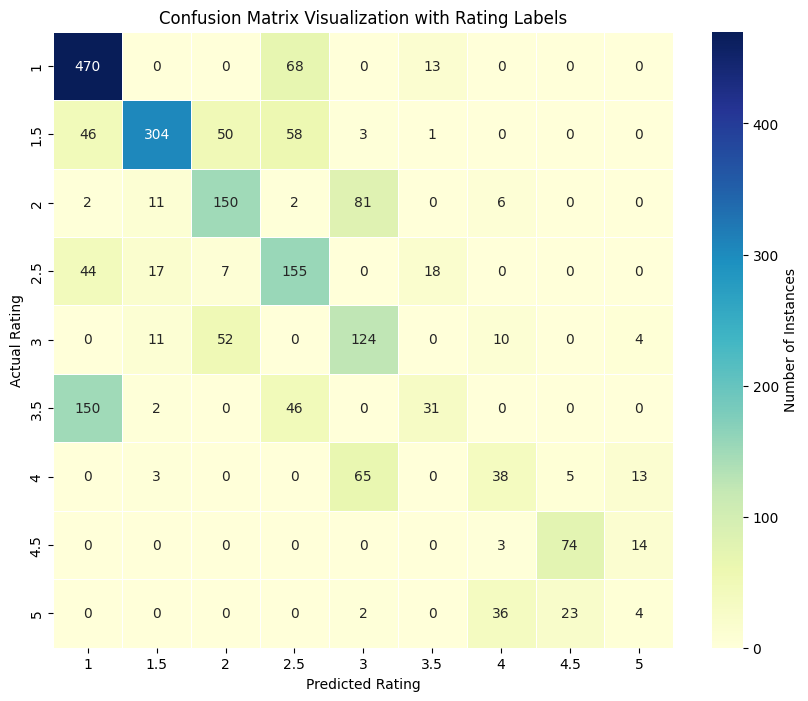

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# The provided confusion matrix data
conf_matrix_data = np.array([
    [470.,   0.,   0.,  68.,   0.,  13.,   0.,   0.,   0.],
    [ 46., 304.,  50.,  58.,   3.,   1.,   0.,   0.,   0.],
    [  2.,  11., 150.,   2.,  81.,   0.,   6.,   0.,   0.],
    [ 44.,  17.,   7., 155.,   0.,  18.,   0.,   0.,   0.],
    [  0.,  11.,  52.,   0., 124.,   0.,  10.,   0.,   4.],
    [150.,   2.,   0.,  46.,   0.,  31.,   0.,   0.,   0.],
    [  0.,   3.,   0.,   0.,  65.,   0.,  38.,   5.,  13.],
    [  0.,   0.,   0.,   0.,   0.,   0.,   3.,  74.,  14.],
    [  0.,   0.,   0.,   0.,   2.,   0.,  36.,  23.,   4.]
])

# Custom labels corresponding to rating classes
rating_labels = ["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]

# Create a DataFrame from the confusion matrix for easier plotting with seaborn
conf_matrix_df = pd.DataFrame(conf_matrix_data, index=rating_labels, columns=rating_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Number of Instances'})
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.title('Confusion Matrix Visualization with Rating Labels')
plt.show()

## Random Forest 

In [5]:
import pandas as pd
from pyspark.sql import SparkSession

# Load the pickle file back into a Pandas DataFrame
pickle_file = "C:/Users/pmgan/Data228/yelp_dataset/merged_df.pkl"
pandas_df = pd.read_pickle(pickle_file)

# Initialize or retrieve the existing Spark session
spark = SparkSession.builder.appName("Load Pickle for ML").getOrCreate()

# Convert the Pandas DataFrame to a Spark DataFrame
merged_df = spark.createDataFrame(pandas_df)

# Building model for random forest classifier 
from pyspark.ml.classification import RandomForestClassifier

# Add a scaling step in your pipeline
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=10,maxBins=180)

# Update the pipeline to include the Random Forest model instead of Logistic Regression
pipeline_rf = Pipeline(stages=[city_indexer,business_indexer, label_indexer, assembler, scaler, random_forest])

# Split data into training and test sets
(train_data, test_data) = merged_df.randomSplit([0.8, 0.2], seed=1234)

# Train the Random Forest model
model_rf = pipeline_rf.fit(train_data)

# Make predictions with the Random Forest model
predictions_rf = model_rf.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Evaluate the Random Forest model using accuracy
accuracy_rf = evaluator.evaluate(predictions_rf)
print("Accuracy on test data = %g for Random Forest" % accuracy_rf)

Accuracy on test data = 0.826715 for Random Forest


In [6]:
# Evaluate the F1 score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score_rf = f1_evaluator.evaluate(predictions_rf)
print(f"F1 Score on test data = {f1_score_rf:.2f} for Random Forest")

F1 Score on test data = 0.81 for Random Forest


In [7]:
# Create an RDD with label and prediction to generate the confusion matrix
prediction_rdd_rf = predictions_rf.select('label', 'prediction').rdd.map(lambda row: (float(row['prediction']), float(row['label'])))

# Create MulticlassMetrics object to obtain the confusion matrix
metrics_rf = MulticlassMetrics(prediction_rdd_rf)

# Retrieve the confusion matrix
confusion_matrix_rf = metrics_rf.confusionMatrix().toArray()

# Custom labels corresponding to rating classes
rating_labels = ["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]

# Create a DataFrame from the confusion matrix for easier plotting with seaborn
df_conf_matrix_rf = pd.DataFrame(confusion_matrix_rf, index=rating_labels, columns=rating_labels)



C:\Users\pmgan\.conda\envs\pyspark_env1\Lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


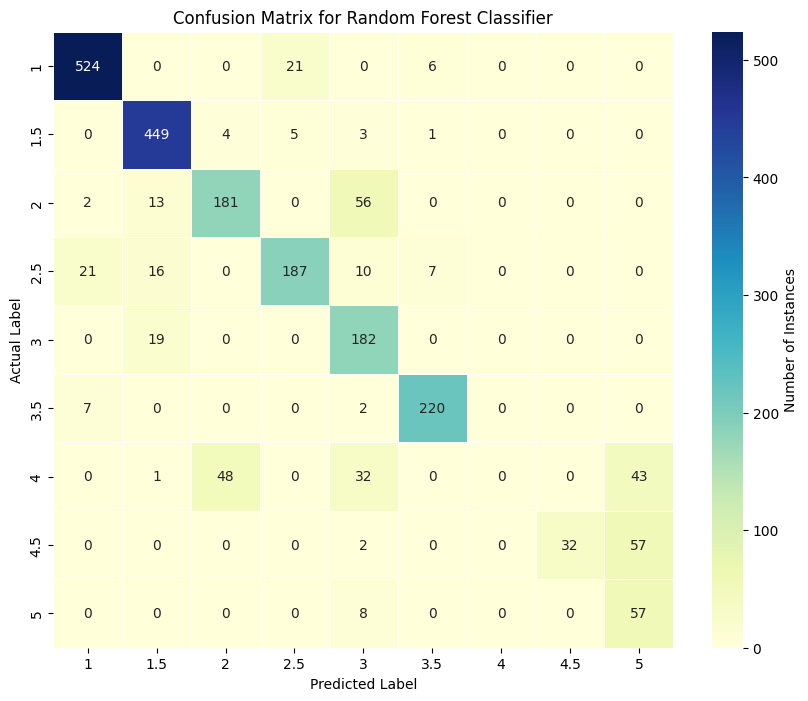

In [8]:
# Plot using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_conf_matrix_rf, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Number of Instances'})
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## Convolutional neural network

In [11]:
import pandas as pd
from pyspark.sql import SparkSession

# Load the pickle file back into a Pandas DataFrame
pickle_file = "C:/Users/pmgan/Data228/yelp_dataset/merged_df.pkl"
pandas_df = pd.read_pickle(pickle_file)

# Initialize or retrieve the existing Spark session
spark = SparkSession.builder.appName("Load Pickle for ML").getOrCreate()

# Convert the Pandas DataFrame to a Spark DataFrame
merged_df = spark.createDataFrame(pandas_df)



from pyspark.ml.feature import StandardScaler, VectorAssembler, StringIndexer
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Example: Fill missing values or drop rows with missing values
merged_df = merged_df.na.fill({'review_count': 0, 'city': 'Unknown', 'sentiment_score': 0.0})
# or
merged_df = merged_df.dropna()

from pyspark.ml.feature import StringIndexer

# Indexing city, business_id, and labels with handling for unseen labels
city_indexer = StringIndexer(inputCol="city", outputCol="city_indexed", handleInvalid="keep").fit(merged_df)
business_indexer = StringIndexer(inputCol="business_id", outputCol="business_indexed", handleInvalid="keep").fit(merged_df)
label_indexer = StringIndexer(inputCol="business_stars", outputCol="label", handleInvalid="keep").fit(merged_df)



# Split data into training and test sets
(train_data, test_data) = merged_df.randomSplit([0.8, 0.2], seed=1234)

# Vector assembler
assembler = VectorAssembler(
    inputCols=["review_count", "city_indexed","business_indexed" ,"net_positive_sentiment_score"],
    outputCol="features"
)



from pyspark.ml.feature import StandardScaler

# Scale features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Define the layers for the neural network
# Note: Replace 'n' with the actual number of classes in your 'stars' column
layers = [4, 5, 4, 9]

# Initialize the neural network classifier
neural_network = MultilayerPerceptronClassifier(
    featuresCol="scaledFeatures",  # Make sure to use scaled features
    labelCol="label",
    maxIter=100,
    layers=layers,
    blockSize=128,
    seed=1234
)

# Pipeline with all stages
pipeline_nn = Pipeline(stages=[city_indexer, business_indexer, label_indexer, assembler, scaler, neural_network])

# Define a parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(neural_network.maxIter, [50, 100, 200]) \
    .build()

# Setup cross-validation
crossval = CrossValidator(estimator=pipeline_nn,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=3)  # Use 3+ folds in practice

# Train model using cross-validation
cvModel = crossval.fit(train_data)


# Make predictions with the neural network model
predictions_nn = cvModel.transform(test_data)

# Evaluate the model using accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_nn = evaluator.evaluate(predictions_nn)
print(f"Accuracy on test data = {accuracy_nn} for Neural Network")

# Evaluate the F1 score of the neural network model
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score_nn = f1_evaluator.evaluate(predictions_nn)
print(f"F1 Score on test data = {f1_score_nn:.4f} for Neural Network")


Accuracy on test data = 0.6890794223826715 for Neural Network
F1 Score on test data = 0.6794 for Neural Network


C:\Users\pmgan\.conda\envs\pyspark_env1\Lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix (Neural Network):
[[498.   0.   0.  53.   0.   0.   0.   0.   0.]
 [ 52. 330.  37.  40.   3.   0.   0.   0.   0.]
 [  2.   7. 198.   0.  45.   0.   0.   0.   0.]
 [150.  23.  15.  53.   0.   0.   0.   0.   0.]
 [  0.  12.  38.   0. 145.   0.   6.   0.   0.]
 [106.   0.   2.   0.   0. 121.   0.   0.   0.]
 [  0.   0.   1.   0.   9.   0.  88.   1.  25.]
 [  0.   0.   0.   0.   2.   0.   0.  72.  17.]
 [  0.   0.   0.   0.   6.   0.  16.  21.  22.]]


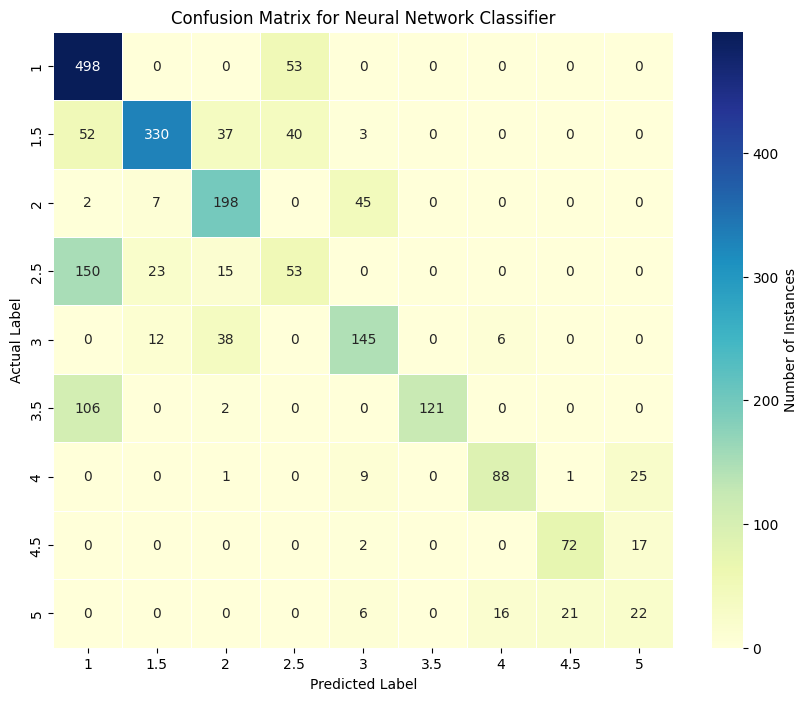

In [12]:
# Generate an RDD with label and prediction for confusion matrix calculation
prediction_rdd_nn = predictions_nn.select('label', 'prediction').rdd.map(lambda row: (float(row['prediction']), float(row['label'])))

# Use MulticlassMetrics to generate the confusion matrix
metrics_nn = MulticlassMetrics(prediction_rdd_nn)
confusion_matrix_nn = metrics_nn.confusionMatrix().toArray()

# Display the confusion matrix
print("Confusion Matrix (Neural Network):")
print(confusion_matrix_nn)

# Optional: Visualize confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Custom labels corresponding to rating classes
rating_labels = ["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]

# Create a DataFrame for easy visualization with seaborn
df_conf_matrix_nn = pd.DataFrame(confusion_matrix_nn, index=rating_labels, columns=rating_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_conf_matrix_nn, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Number of Instances'})
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Neural Network Classifier')
plt.show()